In [8]:
!ls -laFh /data/books/machine-learning-for-engineers/chapter-02

total 636K
drwxr-xr-x 6 root root  192 Jan  2 16:40 ./
drwxr-xr-x 3 root root   96 Jan  2 16:40 ../
-rw-r--r-- 1 root root 606K Jan  2 16:40 blue_jay.jpg
-rw-r--r-- 1 root root 3.7K Jan  2 16:40 iris.csv
-rw-r--r-- 1 root root  18K Jan  2 16:40 mpg.csv
-rw-r--r-- 1 root root   74 Jan  2 16:40 sample_missing_data.csv


In [77]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn.apionly as sns
import matplotlib.pyplot as plt

In [4]:
sns.set(style='whitegrid', context='notebook')

In [75]:
%%markdown
* We could have used ```sns.load_dataset('iris')```, loading data from [http://github.com/mwaskom/seaborn-data](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv),
but for convenience reason, the data has already been downloaded and [added to that repository](https://github.com/machine-learning-helpers/docker-python-jupyter/tree/master/data/books/machine-learning-for-engineers/chapter-02).

* We could have used ```sns.load_dataset('iris')```, loading data from [http://github.com/mwaskom/seaborn-data](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv),
but for convenience reason, the data has already been downloaded and [added to that repository](https://github.com/machine-learning-helpers/docker-python-jupyter/tree/master/data/books/machine-learning-for-engineers/chapter-02).

In [88]:
iris2 = pd.read_csv('/data/books/machine-learning-for-engineers/chapter-02/iris.csv')
iris2.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [79]:
%%markdown
# References
* [Wikipedia definition of the covariance](http://en.wikipedia.org/wiki/Covariance)

# References
* [Wikipedia definition of the covariance](http://en.wikipedia.org/wiki/Covariance)

In [80]:
def covariance (X, Y, bias = False):
    """Calculate the covariance, with or without a bias."""
    xhat = np.mean(X)
    yhat = np.mean(Y)
    epsilon = 0
    for (x, y) in zip (X, Y):
        epsilon += (x - xhat) * (y - yhat)
    cov = 0.0
    if (bias == True): cov = epsilon / len(X)
    else: cov = epsilon / (len(X) - 1)
    return cov

In [81]:
X = [1,3,4]
Y = [1,0,2]
lbias = False
print ("Mean, variance and stddev of X: ", np.mean(X), np.var(X), np.sqrt(np.var(X)))
print ("Mean, variance and stddev of Y: ", np.mean(Y), np.var(Y), np.sqrt(np.var(Y)))
print ("Covariance of X and Y: ", covariance (X, Y, bias=lbias))
print ("Covariance matrix of (X, Y):\n", np.cov(X, Y, bias=lbias))


Mean, variance and stddev of X:  2.66666666667 1.55555555556 1.24721912892
Mean, variance and stddev of Y:  1.0 0.666666666667 0.816496580928
Covariance of X and Y:  0.5
Covariance matrix of (X, Y):
 [[ 2.33333333  0.5       ]
 [ 0.5         1.        ]]


In [82]:
def correlation (X, Y):
    return (covariance(X,Y) / (np.std(X, ddof=1) * np.std(Y, ddof=1)))
    

In [83]:
print (correlation ([1,1,4,3], [1,0,2,2]))
print (np.corrcoef ([1,1,4,3], [1,0,2,2]))


0.870388279778
[[ 1.          0.87038828]
 [ 0.87038828  1.        ]]


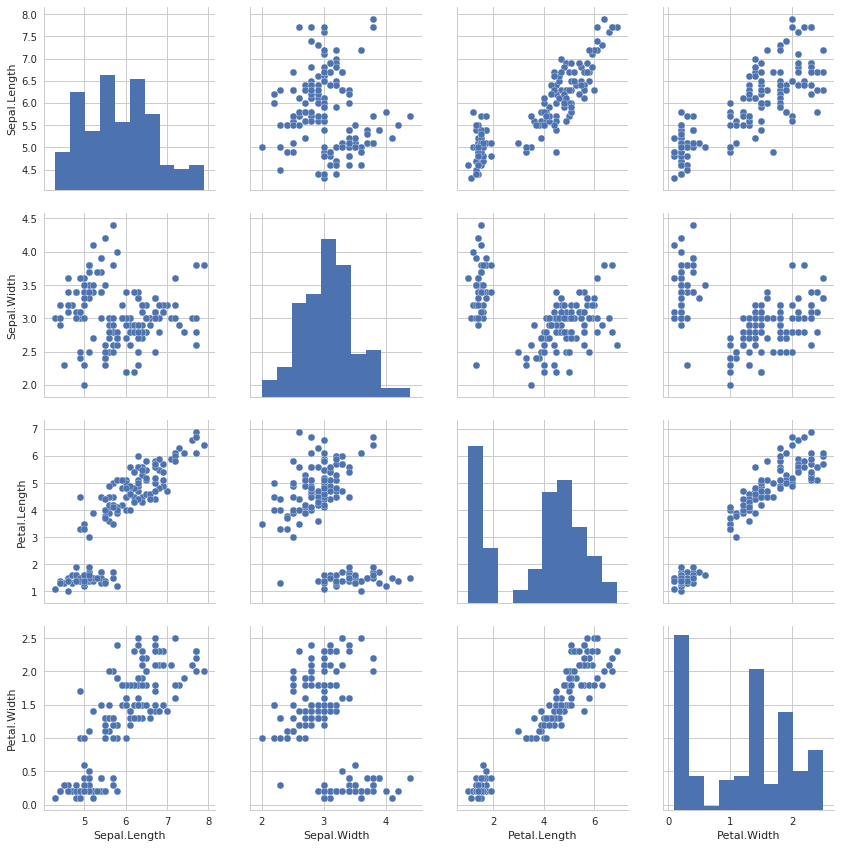

In [84]:
sns.pairplot(iris2, size=3.0)

In [89]:
X = iris2['Petal.Width']
Y = iris2['Petal.Length']

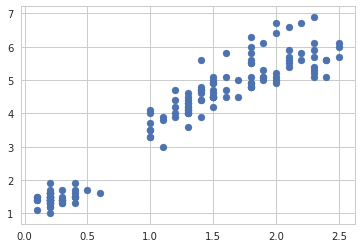

In [90]:
plt.scatter(X,Y)

In [91]:
def predict(alpha, beta, x_i):
    return beta * x_i + alpha


In [93]:
def error(alpha, beta, x_i, y_i): #L1
    return y_i - predict(alpha, beta, x_i)

def sum_sq_e(alpha, beta, x, y): #L2
    return sum(error(alpha, beta, x_i, y_i)**2 for x_i, y_i in zip(x, y))
    

In [94]:
def correlation_fit(x, y):
    beta = correlation(x, y) * np.std(y, ddof=1) / np.std(x,ddof=1)
    alpha = np.mean(y) - beta * np.mean(x)
    return alpha, beta


In [95]:
alpha, beta = correlation_fit(X, Y)
print(alpha)
print(beta)


1.08355803285
2.22994049512


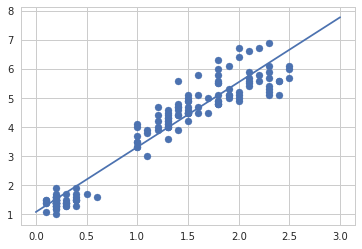

In [97]:
plt.scatter(X, Y)
xr = np.arange(0, 3.5)
plt.plot(xr, (xr*beta)+alpha)
